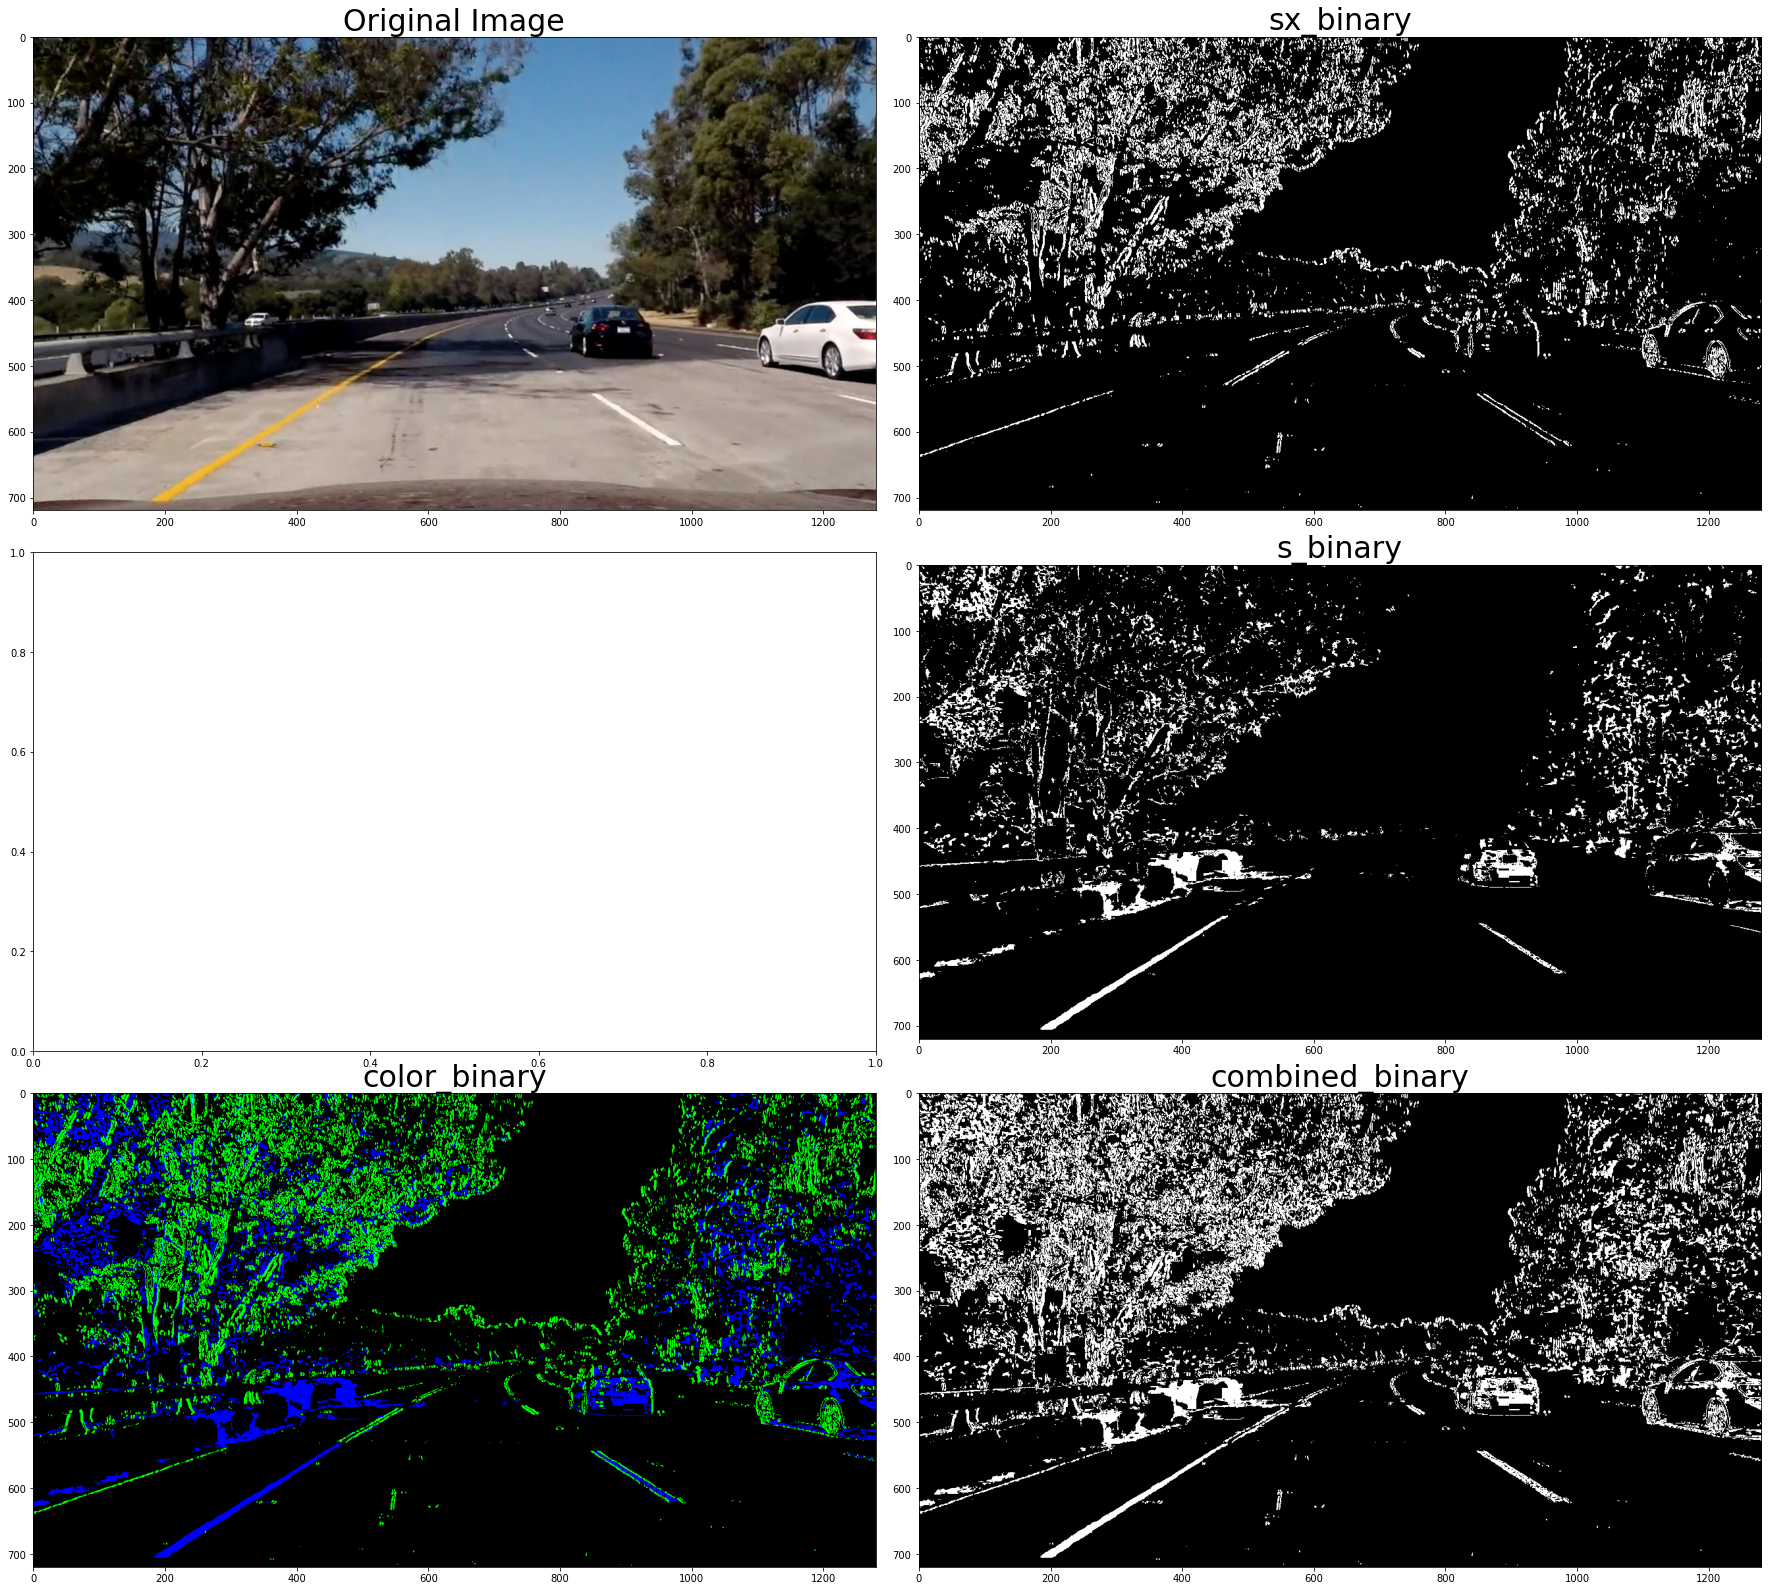

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    
    
    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    
    # Sobel x    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    
#     sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x

    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sx_binary = np.zeros_like(scaled_sobel)
    sx_binary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    
    
    # Stack each channel: black in R channel, sxbinary in G channel, s_binary in B channel
    color_binary = np.dstack(( np.zeros_like(sx_binary), sx_binary, s_binary)) * 255
        
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sx_binary)
    combined_binary[(s_binary == 1) | (sx_binary == 1)] = 1

    return sx_binary, s_binary, combined_binary, color_binary 
    
sx_binary, s_binary, combined_binary, color_binary = pipeline(image)


f, axs = plt.subplots(3, 2, figsize=(24, 24))
f.tight_layout()

axs[0, 0].imshow(image)
axs[0, 0].set_title('Original Image', fontsize=30)

axs[0, 1].imshow(sx_binary, cmap='gray')
axs[0, 1].set_title('sx_binary', fontsize=30)

axs[1, 1].imshow(s_binary, cmap='gray')
axs[1, 1].set_title('s_binary', fontsize=30)

axs[2, 1].imshow(combined_binary, cmap='gray')
axs[2, 1].set_title('combined_binary', fontsize=30)

axs[2, 0].imshow(color_binary)
axs[2, 0].set_title('color_binary', fontsize=30)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)